## COMP3670 Programming Assignment 2 - Linear Regression and Gradient Descent
---

**Enter Your Student ID: u7205329** 

**Your Name: Thao Pham**
    
**Deadline: 23:59pm September 27th, 2020**

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'.

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.


---
**Marking distribution for the homework/assignment**

- Task1 = 60%
- Task2 = 40%

---


PROGRAMMING SECTION
---

For all of the following, program the solution yourself. Don't just call a library function that does the whole question for you, or you'll get zero (no, that doesn't mean you can't use any library functions, but it does mean that you have to show you understand how to compute the answer yourself).


-----------

   **TASK 0.1:** You know the drill. Import Numpy and PyPlot. We're also going to read a dataset.


-----------

In [1]:
# numpy
import numpy as np

# display
from IPython.core.display import HTML

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Linear Regression and Gradient Descent
---

This week we're focussing on linear regression.

Specifically for exercise 1, we're going to implement multiple target **batch** linear regression with mean squared loss,

$$\mathcal{L} = \frac{1}{2 m} \sum_{i = 0}^{m} \mid \mid x_i\theta - y_i \mid \mid^2$$.

For the following questions:
- $x \in \mathbb{R}^{m}$ is the vector directly representing input features from the provided dataset. Each row of $x$ is a single training example.
- $X \in \mathbb{R}^{m \times n}$ is the constructed feature matrix (e.g. polynomial features) used for learning. Each row of $X$ is a single training example.
- $\theta$ is our parameters. In the linear regression you've seen thus far, this is a vector. However, as we're doing multiple target linear regression, $\theta$ will be a matrix.
- $y \in \mathbb{R}^{m}$ is a matrix of the target values we're trying to estimate for each row of $X$. Each row $i$ of $X$ corresponds to row $i$ of $Y$.
- $m$ is the number of training examples.
- $n$ is the dimensionality of one training example.

Typically when people think of linear regression, they think of a mapping from $\mathbb{R}^n \rightarrow \mathbb{R}$, where they're trying to predict a single scalar value.


---
**Task 1.1**: Complete the `read_data` function by loading the file `q1.npy`.

---

**HINT**: https://numpy.org/doc/stable/reference/generated/numpy.load.html

In [2]:
def read_data():
    x_train, x_val, y_train, y_val = np.load('q1.npy')
    return x_train, x_val, y_train, y_val

# read data
x_train, x_val, y_train, y_val = read_data()

In [3]:
print(len(x_val))

50


The first step in any ML problem is always to visualize the data if possible.

---
**Task 1.2**:  Complete the code for visualizing the training dataset.

---

**HINT**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

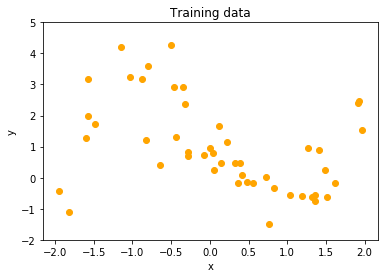

In [4]:
# plot training data

## YOUR CODE HERE ... plt.plot()
plt.scatter(x_train, y_train, color = 'orange')
plt.title("Training data")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,5])
plt.show()

---
**Task 1.3**: Is it a good idea to perform linear regression directly on the input features `x`. Explain why?

---

**Answer**: It is not a good idea to perform linear regression directly as there is no apparent linear association between `x` and `y`. Rather, there appears to be a curved relationship between `x` and `y`.

---
Lets construct an appropriate feature vector.

---
**Task 1.4**:  Complete the `get_polynomial_features` function with the following specifications.
* Input1: an array `x` of shape $(m,1)$.
* Input2: `degree` of the polynomial (integer greater than or equal to one).
* Output: matrix of shape $(m,degree+1)$ consisting of horizontally concatenated polynomial terms. 
---



In [5]:
def get_polynomial_features(x,degree=5):
    A = np.zeros((len(x), degree+1))
    i = 0
    while i < len(x):
        j = 0
        while j <= degree:
            A[i][j] = x[i]**j
            j += 1
        i += 1
    return A

# get polynomial features
X_train = get_polynomial_features(x_train,degree=5)
#print(X_train)
print(X_train.shape)

(50, 6)


Let us implement gradient descent to find the optimal $\theta$.


---

**TASK 1.5:** Write a function $initialise\_parameters(n) = \theta$, where $\theta$ is the parameters we will use for linear regression $X\theta = Y$ for $X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m}$.

The values of $\theta$ should be randomly generated. You will be judged on whether the matrix $\theta$ is correctly constructed for this problem.


---

**HINT:** $\theta$ should be an array of length $n$.

In [6]:
def initialise_parameters(n):
    theta = np.random.randn(n)
    return theta

# initialize theta
theta = initialise_parameters(X_train.shape[1])
print(theta)

[-0.97360835 -0.0252186  -0.27166267 -0.7731497  -0.9154256   0.13736565]


---

**TASK 1.6:** Implement a function $ms\_error(X, \theta, y) = err$, which gives the **mean** squared error over all $m$ training examples.

---

In [7]:
def ms_error(X, theta, y):
    SSE = np.linalg.norm(y-X@theta)**2
    m = X.shape[0]
    MSE = (1/m) * SSE
    return MSE

print(ms_error(X_train, theta, y_train))

43.51649727103905


---

**TASK 1.7:** Implement $grad(X, \theta, Y) = g$, a function that returns the average gradient ($\partial \mathcal{L}/\partial {\theta}$) across all the training examples $x_i \in \mathbb{R}^{1 \times n}$.

---

**HINT:** 
- The gradient should be an array with same length as $\theta$.
- https://www.sharpsightlabs.com/blog/numpy-sum/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [8]:
def grad(X, theta, Y):
    n = X.shape[0]
    first_term = (Y.T)@X
    second_term = (theta.T@X.T)@X
    
    return (1/n) * (-2*first_term + 2*second_term)

print(grad(X_train, theta, y_train))


[ -9.60051143  -3.37807293 -20.60392496 -12.18741493 -61.46170169
 -43.09408356]


---

**TASK 1.8:** Implement $batch\_descent(X, Y, iterations, learning\_rate) = \theta, L$, a function which implements batch gradient descent returning $\theta$ (parameters which estimate $Y$ from $X$), and $L$.

$iterations$ is the number of gradient descent iterations to be performed.

$learning\_rate$ is, of course, the learning rate.

$L$ is a matrix recording the mean squared error at every iteration of gradient descent. It will be an array of length $iterations$.

You should use the functions you completed earlier to complete this. 

---

**HINT:** 
- Remember, the point of gradient descent is to minimise the loss function. 
- It does this by taking "steps". The gradient always points in the steepest direction uphill, so by stepping in the opposite direction of the gradient we move toward the value of $\theta$ that minimises the loss function.

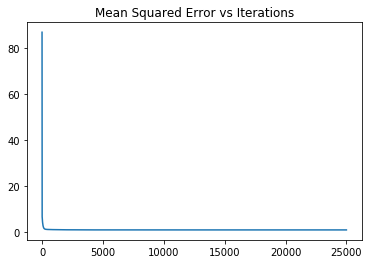

New Theta: 
 [ 1.00040296 -2.68325365  0.19162055  0.708666   -0.08011433  0.05804041]

Final Mean Squared Error: 
 0.767137205636029


In [9]:
def batch_descent(X, Y, iterations, learning_rate):
    n = X.shape[1]
    theta = initialise_parameters(n)
    L = np.zeros(iterations)
    
    i = 0
    while i < iterations:
        current_gradient = grad(X, theta, Y)
        mse = ms_error(X, theta, Y)
        L[i] = mse
        theta = theta - learning_rate*(current_gradient)
        i += 1

    return theta,L

#REPORTING CODE. YOU MAY NEED TO MODIFY THE LEARNING RATE OR NUMBER OF ITERATIONS
new_theta, L = batch_descent(X_train, y_train, 25000, 0.0049)
plt.plot(L)
plt.title('Mean Squared Error vs Iterations')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, new_theta, y_train))

---
The optimal $\theta$ can also be computed using the normal equation, which provides a closed form solution for linear regression.

---
**Task 1.9**: Compute optimal $\theta$ using the closed form solution for linear regression.

---


In [10]:
X_train = get_polynomial_features(x_train,degree=5)

theta_ = (np.linalg.inv(X_train.T @ X_train)) @ (X_train.T @ y_train)

print('Theta: \n', theta_)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, theta_ , y_train))

Theta: 
 [ 1.00041445 -2.68351443  0.19158454  0.70892389 -0.08010265  0.05798774]

Final Mean Squared Error: 
 0.7671372006603077


<div class="alert alert-block alert-info">The above answer should be similar with the result of gradient descent.</div>

## Task 2: Regularization and Model Selection
---

In the previous task, we focussed on using gradient descent to do linear regression with a polynomial of degree 5.

Next, we would try to select a model that gives best performance on the val set.

---
**Task 2.1**:  Visualize the prediction curves for different choice of degree polynomial features, by completing the code below. 

- You can use the closed form solution or gradient descent for computing $\theta$.
- Compute the predictions on val data using `x_val` and computed $\theta$.
---

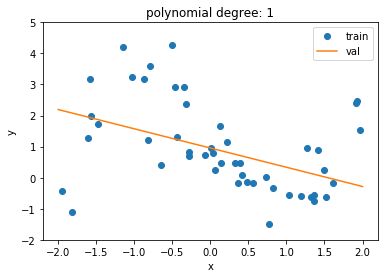

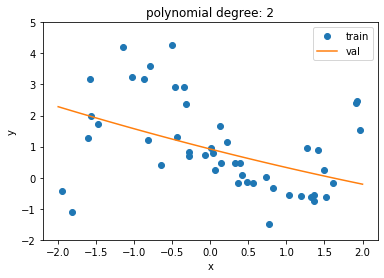

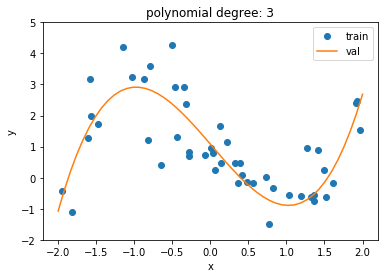

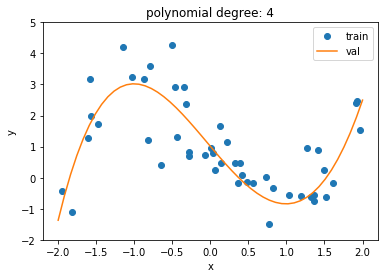

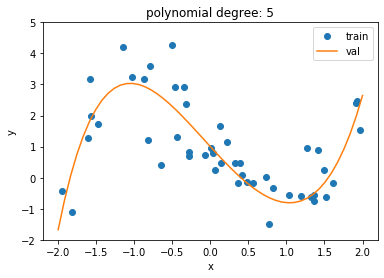

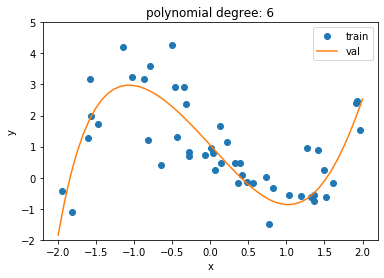

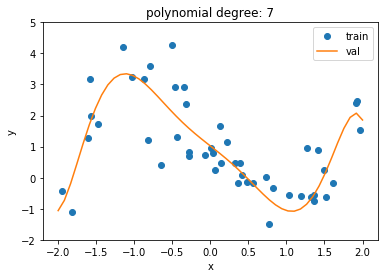

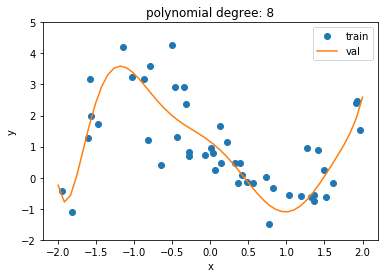

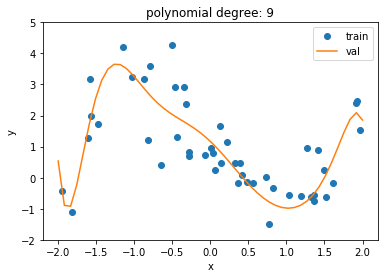

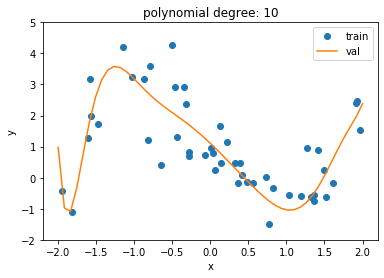

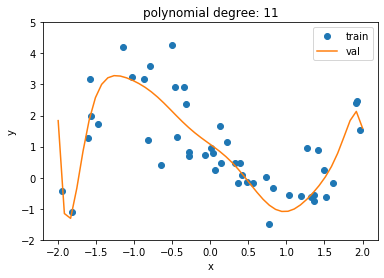

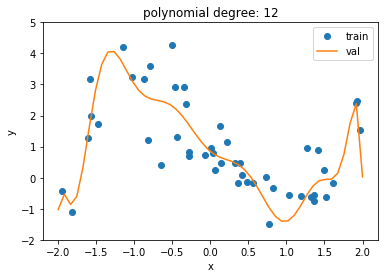

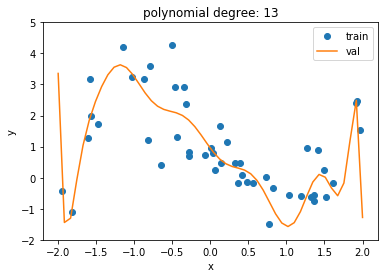

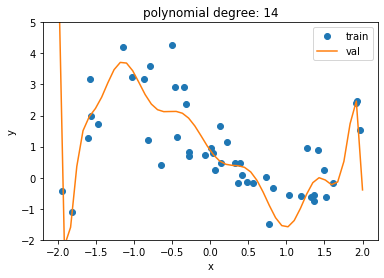

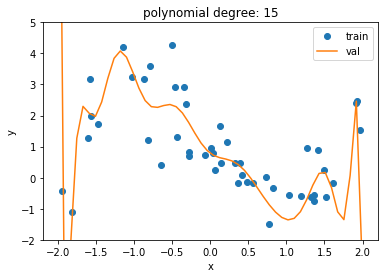

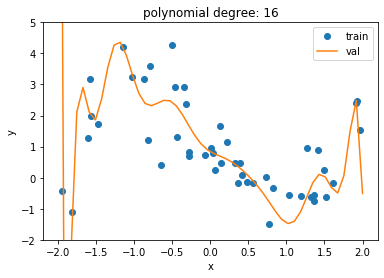

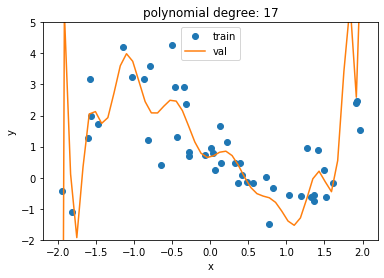

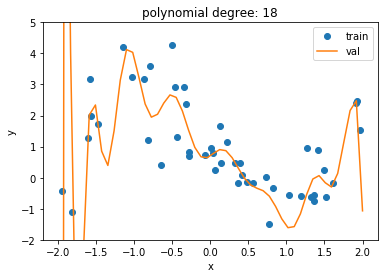

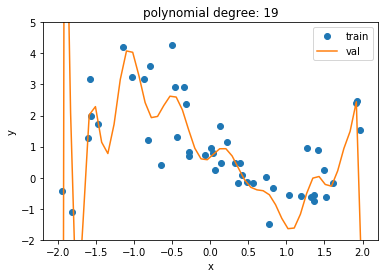

In [11]:
# read data
x_train, x_val, y_train, y_val = read_data()

def get_theta(X,y):
    theta_ = (np.linalg.inv(X.T @ X)) @ (X.T @ y)
    return theta_

def get_prediction(X,theta):
    Y_predicted = X@theta
    return Y_predicted

# DO NOT MODIFY
for degree in range(1,20):
    # prepare train/val data
    X_train = get_polynomial_features(x_train,degree=degree)
    x_val = np.linspace(-2,2,x_val.shape[0])
    X_val = get_polynomial_features(x_val,degree=degree)
    
    # get theta
    theta = get_theta(X_train,y_train)
    
    # compute predictions on train/val set
    pred_y_train = get_prediction(X_train,theta)
    pred_y_val = get_prediction(X_val,theta)
    
    # plot results
    plt.plot(x_train,y_train,'o',label='train')
    plt.plot(x_val,pred_y_val,label='val')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("polynomial degree: {}".format(degree))
    plt.ylim([-2,5])
    plt.show()

---
**Task 2.2**:  Plot the train, val mse loss curve for different degree polynomials by completing the following code.

---


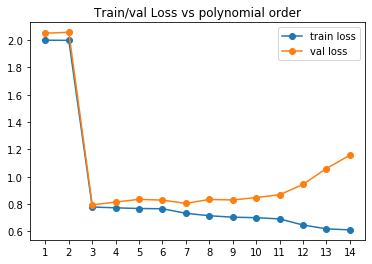

In [12]:
# read data
x_train, x_val, y_train, y_val = read_data()

# store train/val loss values
train_loss,val_loss = [],[]

for degree in range(1,15):
    # prepare train/val data
    X_train = get_polynomial_features(x_train,degree=degree)
    X_val = get_polynomial_features(x_val, degree = degree)
    
    # get theta
    theta = get_theta(X_train,y_train)
    
    # compute train/val losses
    train_loss.append(ms_error(X_train, theta, y_train))
    val_loss.append(ms_error(X_val, theta, y_val))
    

# DO NOT MODIFY
plt.plot(range(1,15),train_loss,'-o',label='train loss')
plt.plot(range(1,15),val_loss,'-o',label='val loss')
plt.xticks(range(1,15))
plt.legend()
plt.title('Train/val Loss vs polynomial order')
plt.show()


---
**Task 2.3**:  What is the best choice for degree of polynomial features suitable for this problem?

---

**Answer**: The plot above suggests that the reasonable number of degree for this problem is about 3 where the testing error is lowest and that the fitted model describes the relationship in the training data fairly well. For higher degrees (especially after 7), we see evidence of overfitting (higher val loss and lower train loss). This increases the complexity of the model and result in the model not generalising well with unseen data. 


Another way to control model complexity is by using a regularization parameter.

The closed form solution for linear regression with a regularization parameter $\lambda$ can be written as,


$$\theta = (X^T X + \lambda I)^{-1} X^T y$$


---
**Task 2.4**:  Complete the code below to compute $\theta$ with regularization term `reg_lambda`.

Note: You need to take special care not to apply regularization on the bias term.

---



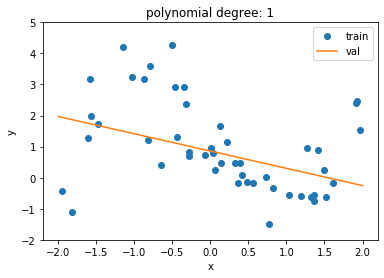

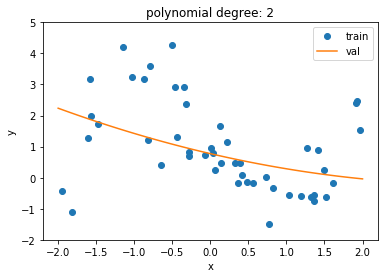

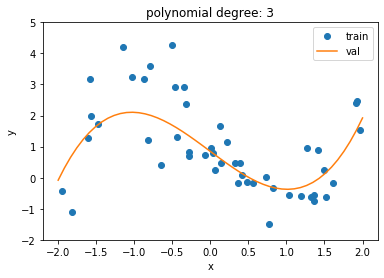

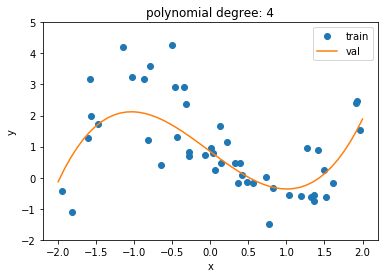

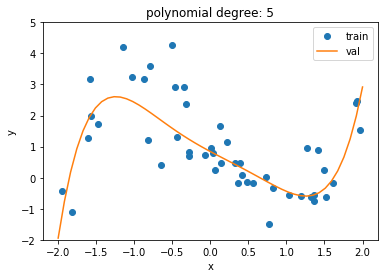

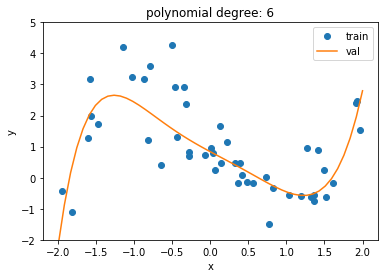

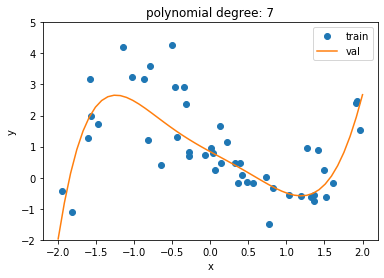

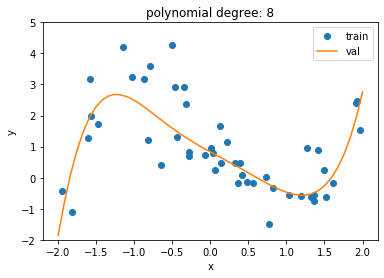

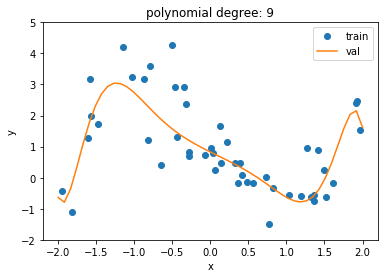

In [13]:
# regularization parameter
reg_lambda = 5

# read data
x_train, x_val, y_train, y_val = read_data()

def get_theta_reg(X_train,y_train,reg_lambda):
    I = np.eye(X_train.shape[1])
    theta = np.linalg.inv(X_train.T @ X_train + reg_lambda*I) @ (X_train.T @ y_train)
    
    return theta

for degree in range(1,10):
    # prepare train/val data
    X_train = get_polynomial_features(x_train,degree=degree)
    x_val = np.linspace(-2,2,x_val.shape[0])
    X_val = get_polynomial_features(x_val,degree=degree)
    
    # get theta
    theta = get_theta_reg(X_train,y_train,reg_lambda)
    
    # compute predictions
    pred_y_train = get_prediction(X_train,theta)
    pred_y_val = get_prediction(X_val,theta)

    # plot prediction curves
    plt.plot(x_train,y_train,'o',label='train')
    plt.plot(x_val,pred_y_val,label='val')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("polynomial degree: {}".format(degree))
    plt.ylim([-2,5])
    plt.show()

<div class="alert alert-block alert-info">You should observe that the learned curves are much smoother with regularization</div>


---
**Task 2.5**:  Plot the train, val loss curves for different values of $\lambda$.

---



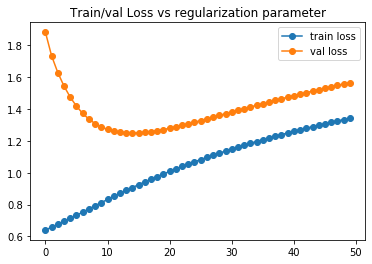

In [14]:
# prepare training data
x_train, x_val, y_train, y_val = read_data()

# regulization parameter
lambda_choices = np.linspace(1,40,50)

# store train/val loss
train_loss,val_loss = [],[]

# starting degree of polynomial
degree = 20
X_train = get_polynomial_features(x_train,degree=degree)
X_val = get_polynomial_features(x_val,degree=degree)


for reg_lambda in lambda_choices:
    # get theta
    theta = get_theta_reg(X_train,y_train,reg_lambda)
    
    # get train/val loss
    train_loss.append(ms_error(X_train, theta, y_train))
    val_loss.append(ms_error(X_val, theta, y_val))

plt.plot(train_loss,'-o',label='train loss')
plt.plot(val_loss,'-o',label='val loss')
plt.legend()
plt.title('Train/val Loss vs regularization parameter')
plt.show()


---
**Task 2.6**:  Based on the above curve, which value of `reg_lambda` is optimal? (You need to just provide a rough estimate)

---

**Answer**: At around $\lambda = 10$ to $\lambda = 13$ where the test error is the smallest. 


<div class="alert alert-block alert-info">End of assignment</div>